In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("2-multiplegradesdataset.csv")

In [3]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [4]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [6]:
df.isnull().sum()

Study Hours           0
Sleep Hours           0
Attendance Rate       0
Social Media Hours    0
Exam Score            0
dtype: int64

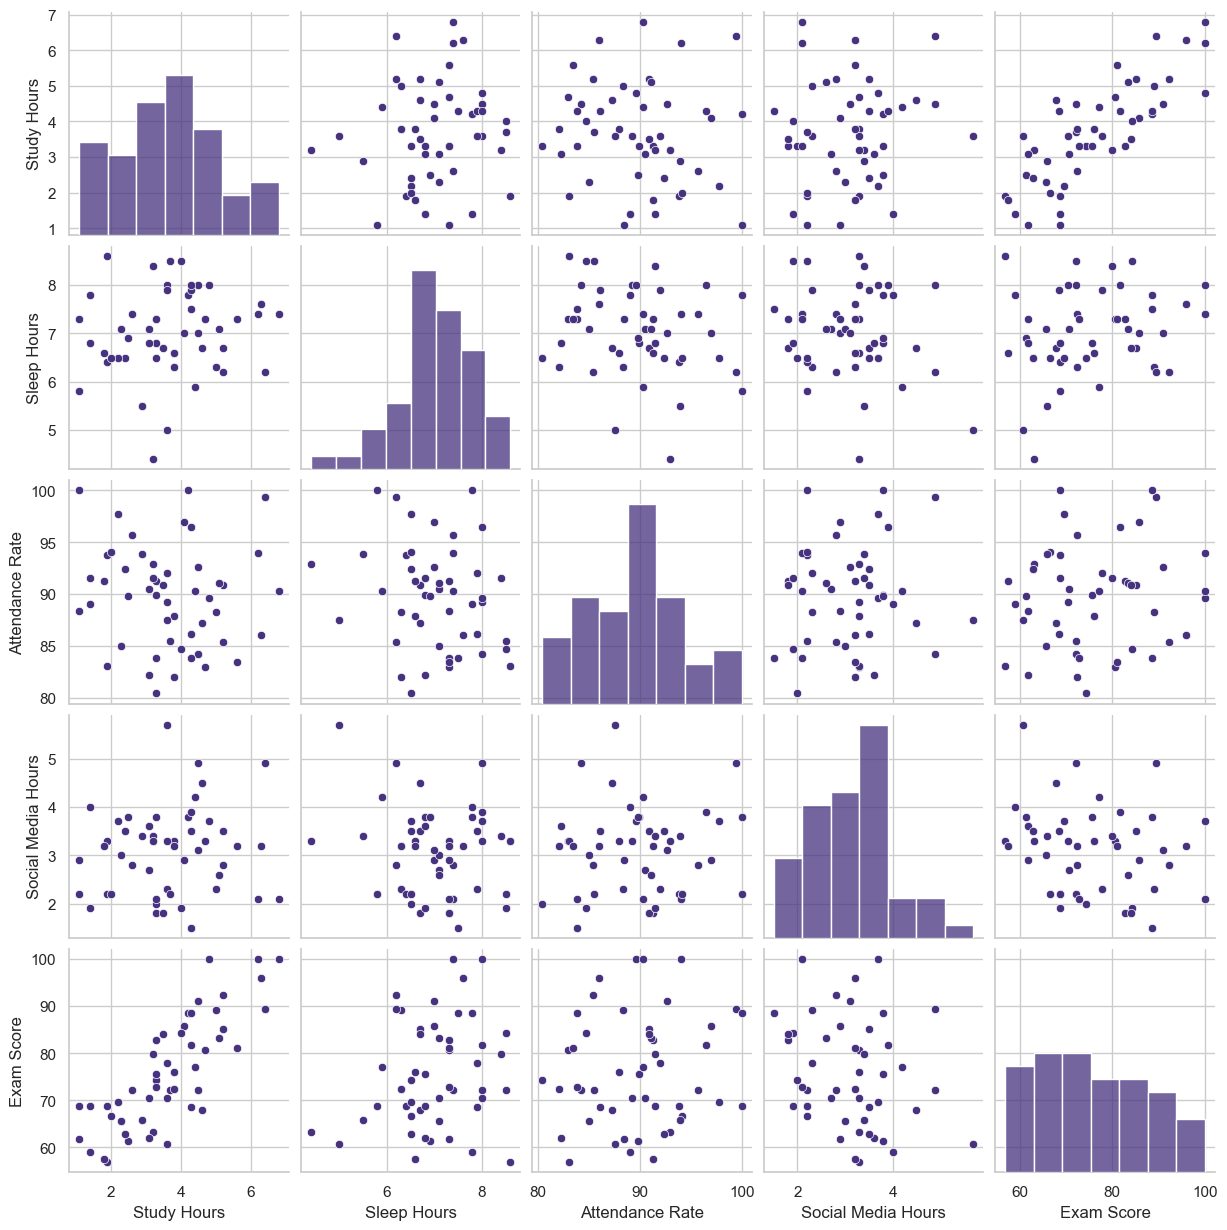

In [9]:
sns.pairplot(df)
plt.show()

In [10]:
df.corr()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


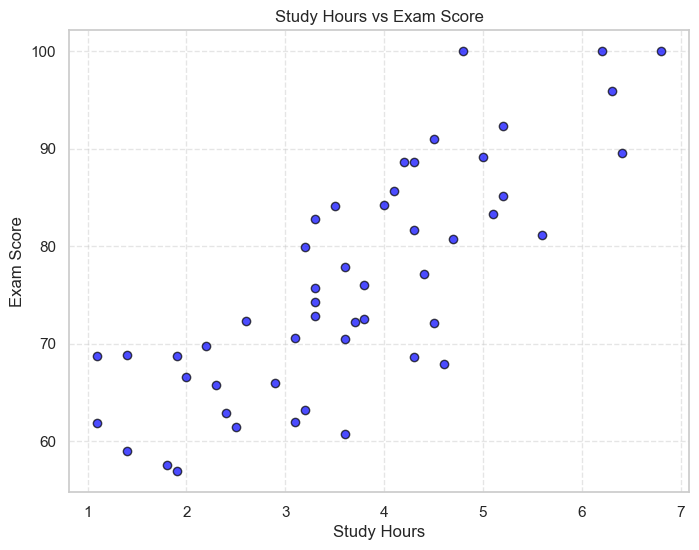

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))  # DOĞRU: figure ve axes aynı anda döner
ax.scatter(df["Study Hours"], df["Exam Score"], color="blue", alpha=0.7, edgecolors="k")
ax.set_title("Study Hours vs Exam Score")
ax.set_xlabel("Study Hours")
ax.set_ylabel("Exam Score")
ax.grid(True, linestyle='--', alpha=0.5)
plt.show()


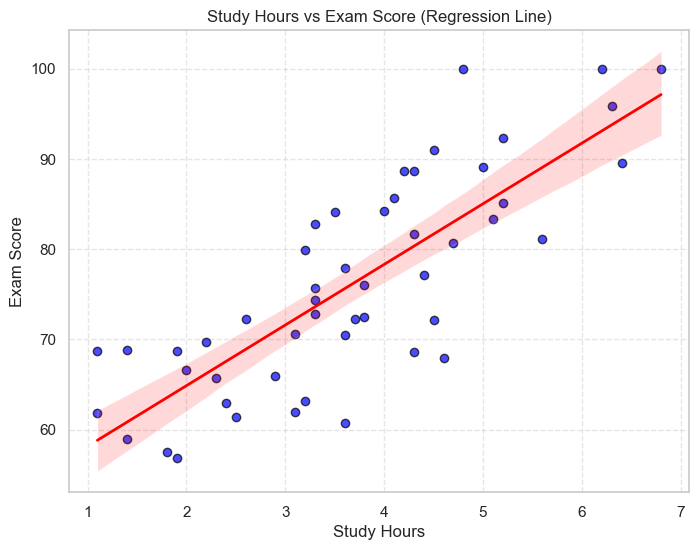

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(
    x="Study Hours", 
    y="Exam Score", 
    data=df,
    scatter_kws={"color": "blue", "alpha": 0.7, "edgecolors": "k"},  # scatter ayarları
    line_kws={"color": "red", "linewidth": 2}                        # çizgi ayarları
)

plt.title("Study Hours vs Exam Score (Regression Line)")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


<Axes: xlabel='Social Media Hours', ylabel='Exam Score'>

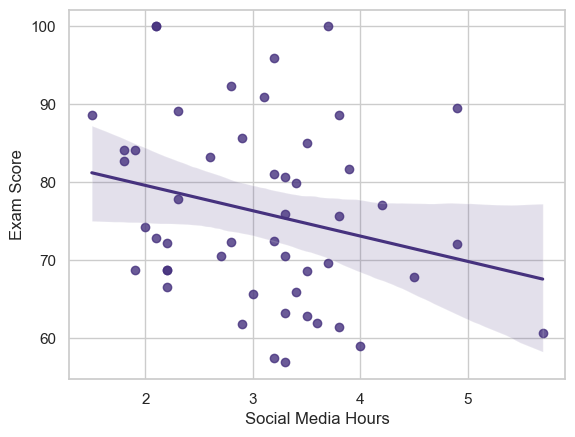

In [20]:
sns.regplot(
    x= df["Social Media Hours"],
    y = df["Exam Score"]
)

In [21]:
df.tail()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
45,2.9,5.5,93.9,3.4,65.9
46,3.3,7.3,83.8,2.1,72.8
47,5.6,7.3,83.4,3.2,81.1
48,4.5,7.0,92.6,3.1,91.0
49,1.4,6.8,91.5,1.9,68.8


In [25]:
#independent and dependent Features
X =df.iloc[:,:-1]
y = df.iloc[:,-1]
#X =  df[["Study Hours","Sleep Hours","Attendance Rate","Social Media Hours"]]
#y = df["Exam Score"]

In [26]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [27]:
y.head()

0    80.7
1    76.0
2    89.1
3    95.9
4    70.5
Name: Exam Score, dtype: float64

In [28]:
#Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train

array([[ 7.64922342e-01,  1.07637448e+00,  2.70413080e-03,
         6.75932027e-01],
       [-1.60676425e+00, -3.94765312e-01,  3.42883785e-01,
         1.46070057e-01],
       [ 1.39737210e+00,  3.40804586e-01, -1.23795108e+00,
         1.46070057e-01],
       [-1.92298913e+00, -1.84602484e-01,  3.82904921e-01,
        -1.23157107e+00],
       [ 2.11528804e-01,  2.55603439e-02,  1.48348616e+00,
        -1.71847126e-01],
       [ 2.90585024e-01,  8.66211656e-01,  2.08380319e+00,
         7.81904421e-01],
       [-2.56398550e-02, -7.10009554e-01, -1.51809903e+00,
         1.46070057e-01],
       [ 9.23034781e-01, -7.10009554e-01, -2.57433252e-01,
        -8.07681490e-01],
       [-4.20920953e-01,  3.40804586e-01, -1.15790881e+00,
        -1.01962628e+00],
       [-2.56398550e-02, -3.94765312e-01, -3.37475524e-01,
         2.52042451e-01],
       [ 3.69641243e-01,  5.50967414e-01, -1.15790881e+00,
        -1.65546064e+00],
       [-9.74314491e-01,  4.45886000e-01,  1.22334877e+00,
      

In [35]:
from sklearn.linear_model import LinearRegression

regression =  LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [36]:
#metriklerin hesaplanması 

In [37]:
X_test[0]

array([-1.29053937, -0.49984673,  1.62356013,  0.67593203])

In [38]:
df.iloc[0]

Study Hours            4.7
Sleep Hours            7.3
Attendance Rate       82.9
Social Media Hours     3.3
Exam Score            80.7
Name: 0, dtype: float64

In [45]:
new_student =[[5,7,90,8]]

In [46]:
new_student_scaled = scaler.transform(new_student)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [47]:
regression.predict(new_student_scaled)

array([64.9345521])

In [48]:
#Prediction

In [49]:
y_pred = regression.predict(X_test)

In [50]:
y_pred

array([ 67.04704385,  57.90545589,  83.63084813,  63.69399367,
        69.73079557,  80.76485587,  93.76445033,  65.93953528,
        64.58675718,  78.42296106,  56.67860558,  64.44046585,
       102.60438643])

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_error

In [56]:
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
print("MSE: " , MSE)
print("MSE: " , MAE)

MSE:  14.600589378986266
MSE:  3.2770264859627876


In [57]:
score = r2_score(y_test,y_pred)

In [58]:
print("r2 score :",score)

r2 score : 0.915670734577271


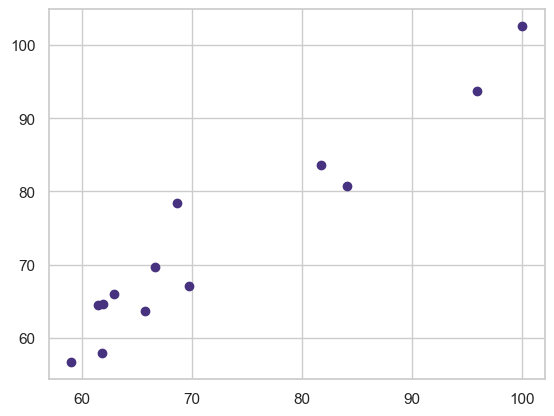

In [59]:
plt.scatter(y_test,y_pred)
plt.show()

In [60]:
residuals = y_test-y_pred

In [61]:
residuals

35    2.652956
37    3.894544
41   -1.930848
26    2.006006
38   -3.130796
43    3.335144
3     2.135550
33   -3.039535
30   -2.686757
36   -9.822961
14    2.321394
16   -3.040466
20   -2.604386
Name: Exam Score, dtype: float64

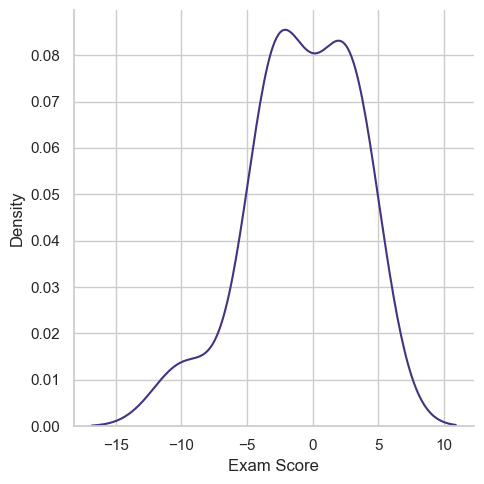

In [62]:
sns.displot(residuals,kind="kde")

In [63]:
regression.intercept_

np.float64(77.41081081081082)

In [64]:
regression.coef_

array([ 9.28014703,  1.78967062,  3.24340001, -4.08127695])

In [65]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [71]:
new_student

[[5, 7, 90, 8]]

In [85]:
students=[
    [6, 7, 80, 6],
    [3, 5, 40, 7],
    [2, 3, 12, 8],
    [1, 11, 32, 9]
]

In [86]:
regression.predict(scaler.transform(students))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([ 74.43091171,  18.37415173, -15.22126828,   1.14251618])